In [1]:
import torch.nn.modules as nn
from torch.optim import SGD
from torch import Tensor
import torch.nn.functional as F
import torch
import numpy as np
from time import time
import mnist
import matplotlib.pyplot as plt

/Users/admin/code/python/NumpyFlow/torch_playground


## 1. 数据集导入

In [2]:
x_train, y_train, x_test, y_test = mnist.load()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


## 2. 简单验证数据集并预处理

(28, 28) [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 2.8088154349439205 -0.42407389439156606


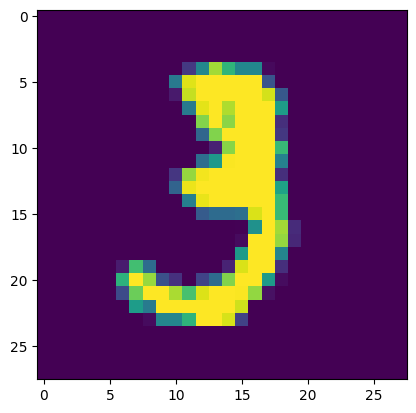

In [6]:
index = 10
x_train = (x_train - x_train.mean()) / x_train.std() # 归一化
img = x_train[index].reshape([28, 28])
print(img.shape, y_train[index], img.max(), img.min())
plt.imshow(img)
plt.show()

## 3. 构建一个网络

In [4]:
class NfModel(nn.Module):
    def __init__(self):
        super(NfModel, self).__init__()
        self.fc1 = nn.Linear(IMAGE_SIZE * IMAGE_SIZE, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, CLASS_SIZE)

    def forward(self, x):
        if isinstance(x, np.ndarray):
            x = Tensor(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), -1)
        return x

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
2.821543345689335 2.794011535161325
0.1251
epoch:  0 1.2700440883636475 	 0.8431 	 1.5795399
epoch:  1 1.1733980178833008 	 0.8613 	 1.5574256
epoch:  2 1.237687110900879 	 0.8659 	 1.5479157
epoch:  3 1.3522820472717285 	 0.8717 	 1.5455495
epoch:  4 1.4116947650909424 	 0.8731 	 1.5455356
epoch:  5 1.1696181297302246 	 0.8783 	 1.5434897
epoch:  6 1.093736171722412 	 0.9392 	 1.4847679
epoch:  7 1.2740421295166016 	 0.9553 	 1.4815471
epoch:  8 1.480029821395874 	 0.9635 	 1.4803652
epoch:  9 1.4795477390289307 	 0.9646 	 1.4792207
[array(1.5795399, dtype=float32), array(1.5574256, dtype=float32), array(1.5479157, dtype=float32), array(1.5455495, dtype=float32), array(1.5455356, dtype=float32), array(1.5434897, dtype=float32), array(1.4847679, dtype=float32), array(1.4815471, dtype=float32), array(1.4803652, dtype=float32), array(1.4792207, dtype=float32)]


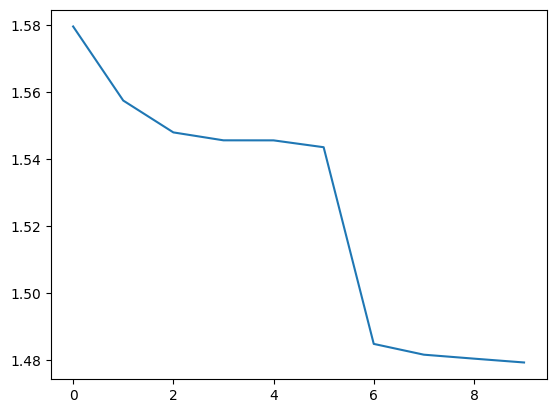

In [6]:
BATCH_SIZE = 60
IMAGE_SIZE = 28
CLASS_SIZE = 10
x_train, y_train, x_test, y_test = mnist.load()
x_train = x_train.astype(float)
x_test = x_test.astype(float)
x_train = (x_train - x_train.mean()) / x_train.std()  # 数据集预处理
x_test  = (x_test - x_test.mean()) / x_test.std()
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
_, input_size = x_train.shape
_, output_size = y_train.shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train.max(), x_test.max())

nfnet = NfModel()
nfopt = SGD(nfnet.parameters(), lr=1e-2, momentum=0.9,nesterov=True) # 学习器

batch = Tensor(x_test)
gt = Tensor(y_test)
nfr = nfnet(batch).detach().numpy()
nfr = np.argmax(nfr, axis=-1)
gt = np.argmax(gt.numpy(), axis=-1)
# print(nfr)
# print(gt)
acc = (nfr == gt).sum()
print(acc / nfr.shape[0])
epch = 10
circle = 999

criterion = nn.CrossEntropyLoss()

loss_list = []

for j in range(epch):
    # print()
    t1 = time()
    for i in range(circle):
        batch = Tensor(x_train[i*BATCH_SIZE:(i+1)*BATCH_SIZE])
        gt = Tensor(y_train[i*BATCH_SIZE:(i+1)*BATCH_SIZE])
        nfr = nfnet(batch)
        loss = criterion(nfr, gt)
        nfopt.zero_grad()
        loss.backward()
        nfopt.step()
        
    batch = Tensor(x_test)
    gt = Tensor(y_test)
    nfr = nfnet(batch).detach().numpy()
    nfr = np.argmax(nfr, axis=-1)
    gt = np.argmax(gt.numpy(), axis=-1)
    acc = (nfr == gt).sum()
    loss_list.append(loss.detach().mean().numpy())
    print("epoch: ",j, time()-t1,"\t", acc / nfr.shape[0],'\t', loss.detach().mean().numpy())
# print(thr)
# print(loss_list)

plt.plot(loss_list)
plt.show()


## 验证数据的预处理

(280, 280) 2.4857252015242763 -0.40229708392013247


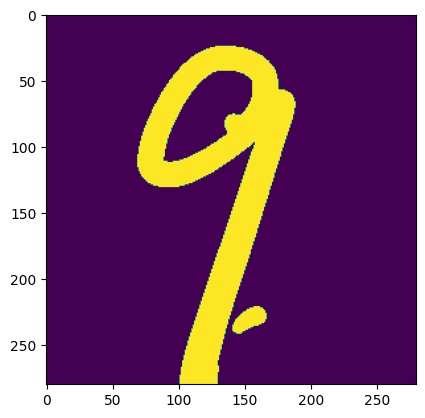

In [40]:
import cv2
test_img = cv2.imread("test.png")
s = [slice(0, 280), slice(360, 690), slice(750, 1080), 0, 0, slice(1820, 2100)]
test_img = test_img[300:580, 3500:3780, 2]
test_img = (test_img > 100) * 255.0
test_img = (test_img - test_img.mean())/test_img.std()
print(test_img.shape, test_img.max(), test_img.min())
plt.imshow(test_img);plt.show()

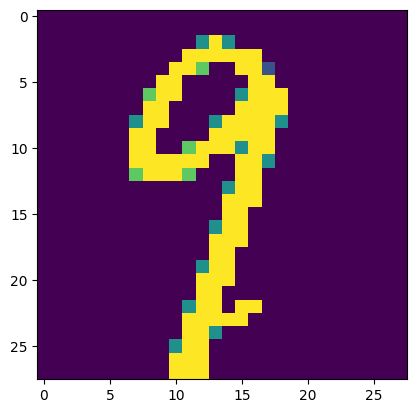

(784,)
7


In [41]:
test_img = cv2.resize(test_img, [28,28])
plt.imshow(test_img);plt.show()
input_img=test_img.reshape(-1)
print(input_img.shape)
nfr = nfnet(input_img).detach().numpy()
nfr = np.argmax(nfr, axis=-1)
print(nfr)

(28, 28) [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 2.8215433456893355 -0.42407389439156606


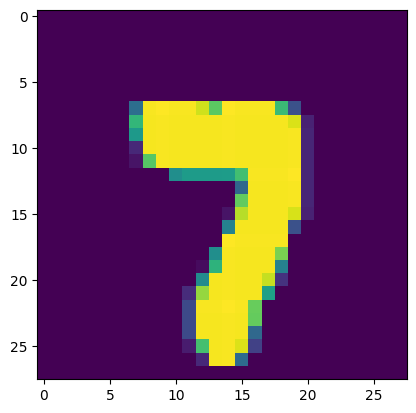

(784,)
7


In [42]:
index = 1231
x_train = (x_train - x_train.mean()) / x_train.std()
img = x_train[index].reshape([28, 28])
print(img.shape, y_train[index], img.max(), img.min())
plt.imshow(img)
plt.show()
input_img=img.reshape(-1)
print(input_img.shape)
nfr = nfnet(input_img).detach().numpy()
nfr = np.argmax(nfr, axis=-1)
print(nfr)